In [1]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
wine = load_wine()

X = wine.data
Y = wine.target



In [2]:

def mahalanobisDistance(p1, p2, sigma):
    p1 = np.atleast_2d(p1)
    p2 = np.atleast_2d(p2)
    return p1               \
            .dot(sigma.I)       \
            .dot(p2.T)      \
            [0,0]

def covarianceMatrix(data):
    R = data - data.mean(axis=0)
    N = data.shape[1]
    print(data.shape)
    cov = R.T.dot(R)/(N-1)
    return np.asmatrix(cov)

def transformPca(data, targetDimension):
    R = data - data.mean(axis=0)
    cov = covarianceMatrix(data)
    values, vectors = np.linalg.eigh(cov)
    sort_transform = np.argsort(values)[::-1]
    
    new_values = values[sort_transform]
    new_vectors = vectors[sort_transform]
    new_vectors = new_vectors[:targetDimension]
    
    return np.dot(new_vectors, R.T).T


(178, 13)


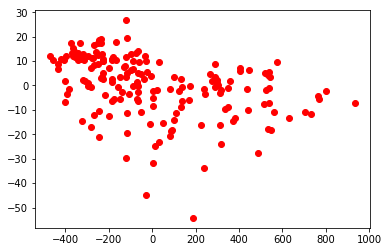

Dlaczego ten wykres jest do góry nogami? Wartość własna nie zachowuje znaku, jak to przeskorzyć?
Testowo PCA z sklearn


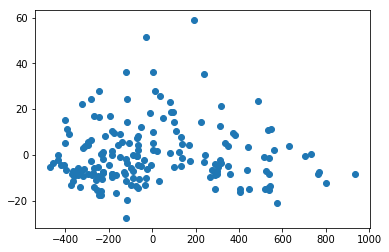

In [5]:
mX = np.array(X)
transformed = transformPca(X, 2)
plotX = transformed[:,0].flatten().A1
plotY = transformed[:,1].flatten().A1

plt.scatter(plotX, plotY, color='r')
plt.show()
print("Dlaczego ten wykres jest do góry nogami? Wartość własna nie zachowuje znaku, jak to przeskorzyć?")

print("Testowo PCA z sklearn")

from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()

wariancja danych przed / po zastosowaniu PCA 


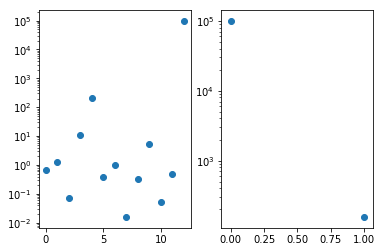

In [6]:
variance = X.var(axis=0).flatten()
variance_transformed = transformed.var(axis=0).flatten().A1

print('wariancja danych przed / po zastosowaniu PCA ')
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_yscale('log')
ax.scatter(np.arange(X.shape[1]), variance)

ax = fig.add_subplot(1, 2, 2)
ax.set_yscale('log')
ax.scatter( np.arange(transformed.shape[1]), variance_transformed)
plt.show()